# Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df =  pd.read_csv("C:/Users/shash/Desktop/Fall 2017/Machine Learning/Exam Datasets/regression_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df = df.drop('id', 1)

In [5]:
df = df.drop('date', 1)

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Defining the correlation matrix

In [7]:
df_corre= df.corr(method='pearson', min_periods=1)
df_corre

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


# Scaling the data

Data scaling or normalization needs to be done to bring all the relevant attributes within the same scale. This makes the learning algorithm's job easier and gives better results.

### Scaling 'price':

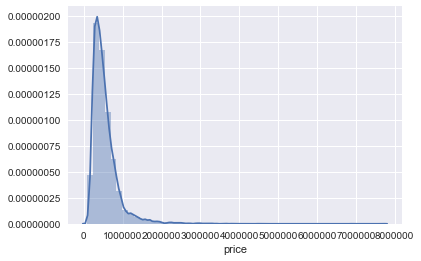

In [8]:
sns.distplot(df['price'])

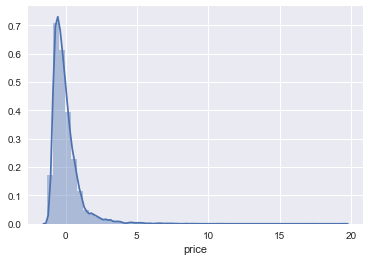

In [9]:
df['price'] = preprocessing.scale(df['price'])
sns.distplot(df['price'])

# Scaling 'sqft_living':

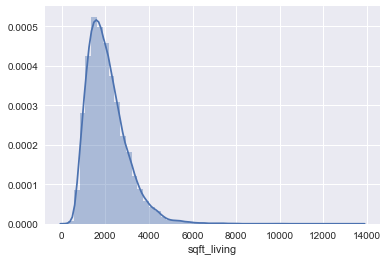

In [10]:
sns.distplot(df['sqft_living'])

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


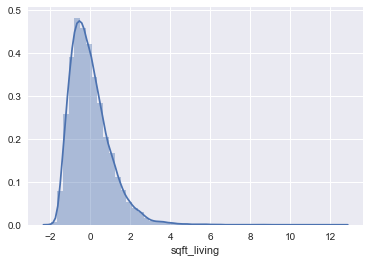

In [11]:
df['sqft_living'] = preprocessing.scale(df['sqft_living'])
sns.distplot(df['sqft_living'])


# Scaling 'sqft_living15':

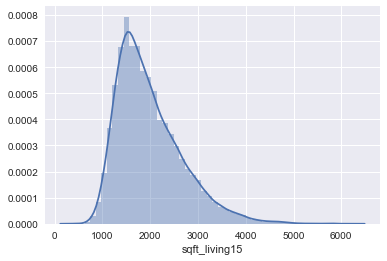

In [12]:
sns.distplot(df['sqft_living15'])

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


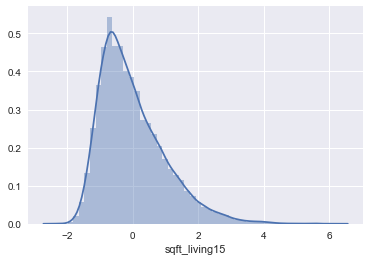

In [13]:
df['sqft_living15'] = preprocessing.scale(df['sqft_living15'])
sns.distplot(df['sqft_living15'])

In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.866717,3,1.00,-0.979835,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,-0.943355,5650
1,-0.005688,3,2.25,0.533634,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,-0.432686,7639
2,-0.980849,2,1.00,-1.426254,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,1.070140,8062
3,0.174090,4,3.00,-0.130550,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,-0.914174,5000
4,-0.081958,3,2.00,-0.435422,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,-0.272190,7503


In [15]:
#Putting the target values into y
y = df.iloc[:, 0:1]

In [16]:
y = pd.DataFrame(y)
y.head()

,price
0,-0.866717
1,-0.005688
2,-0.980849
3,0.174090
4,-0.081958


In [17]:
#Dropping the target attribute from the original dataset
X = df.drop('price', 1)

In [18]:
del df['price']

In [19]:
del df['long']

In [20]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,3,1.00,-0.979835,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-0.943355,5650
1,3,2.25,0.533634,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-0.432686,7639
2,2,1.00,-1.426254,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,1.070140,8062
3,4,3.00,-0.130550,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-0.914174,5000
4,3,2.00,-0.435422,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-0.272190,7503


### Drop columns that had least correlation
From the correleation matrix, the attributes that had least correlation are: bedrooms, waterfront, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, long and sqft_lot15

In [21]:
X = df.drop(df.columns[[0,5,7,9,10,11,12,13,16]], axis=1)
X.head()

,bathrooms,sqft_living,sqft_lot,floors,view,grade,lat,sqft_living15
0,1.00,-0.979835,5650,1.0,0,7,47.5112,-0.943355
1,2.25,0.533634,7242,2.0,0,7,47.7210,-0.432686
2,1.00,-1.426254,10000,1.0,0,6,47.7379,1.070140
3,3.00,-0.130550,5000,1.0,0,7,47.5208,-0.914174
4,2.00,-0.435422,8080,1.0,0,8,47.6168,-0.272190


### Splitting the data into training and testing set

The dataset needs to be split into training and testing set, as the learning algorithm needs to be first trained on the training data. The argument 'test_size=0.2' splits the dataset as 80% training and 20% testing. Once the algorithm is trained, it can be used for prediction using the testing data.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
y_test.head()

,price
2406,-0.831034
15276,-0.073786
8471,-0.068338
568,0.190434
1993,-0.594053


## Lasso Regression

In [24]:
#Creating 'lasso' object 
lasso = LassoCV(alphas = [0.001, 0.01, 0.1, 1, 2], max_iter = 10000, cv = 5)

In [25]:
#Fitting the data
lasso.fit(X_train, y_train)

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=[0.001, 0.01, 0.1, 1, 2], copy_X=True, cv=5, eps=0.001,
    fit_intercept=True, max_iter=10000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [26]:
pred = lasso.predict(X_test)

In [27]:
#Transforming 'pred' into dataframe for easier calculations (pred was previously a np.array)
pred = pd.DataFrame(pred)
pred.columns = ['pred']
pred.head()

,pred
0,-1.149716
1,0.023720
2,-0.199723
3,-0.245359
4,-0.350976


In [28]:
y_test.head()

,price
2406,-0.831034
15276,-0.073786
8471,-0.068338
568,0.190434
1993,-0.594053


In [29]:
r2 = r2_score(y_true = y_test, y_pred = pred)
print(r2)

0.631327103214


In [30]:
MSE = np.mean((y_test['price']-pred['pred'])**2)
print(MSE)

1.9157678098971471


In [31]:
scores = cross_val_score(lasso, X_test, y_test, cv = 5)
scores

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d arr

array([ 0.6289588 ,  0.64274841,  0.59629422,  0.61087378,  0.66250611])

In [32]:
#Best alpha
lasso.alpha_

0.001

# Kernel Ridge Regression

### Linear Kernel

In [33]:
#Linear Kernel
kr = GridSearchCV(KernelRidge(kernel = 'linear', gamma = 1), cv = 5, param_grid = {"degree": [2, 4, 7]})

In [34]:
kr = kr.fit(X_train, y_train)

C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7612855715377067e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.527015820049538e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7520786285830082e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

In [35]:
y_kr = kr.predict(X_test)

In [36]:
y_kr = pd.DataFrame(y_kr)
type(y_kr)

pandas.core.frame.DataFrame

In [37]:
y_kr.columns = ['y_kr']
y_kr.head()

,y_kr
0,-0.652325
1,-0.315626
2,-0.446305
3,-0.329479
4,-0.555183


In [38]:
#R squared error
r2 = r2_score(y_true = y_test, y_pred = pred)
print(r2)

0.631327103214


In [39]:
#Mean squared error
MSE = np.mean((y_test['price'] - y_kr['y_kr'])**2)

In [40]:
print(MSE)

1.8335500975962635


In [41]:
#Cross val score
scores = cross_val_score(kr, X_test, y_test, cv = 5)
scores

C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0795602698861495e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1001852597787716e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0795602698861495e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected

array([ 0.54380062,  0.56716118,  0.55032196,  0.56106953,  0.58244346])

### Polynomial Kernel

In [42]:
#Polynomial Kernel
kr_poly = GridSearchCV(KernelRidge(kernel = 'poly', gamma = 1), cv = 5, param_grid = {"degree": [2, 4, 7]})

In [43]:
kr_poly = kr_poly.fit(X_train, y_train)

C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.913930717487041e-49
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.8909648275622448e-50
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.724585342903756e-49
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. 

In [44]:
y_kr_poly = kr_poly.predict(X_test)

In [45]:
y_kr_poly = pd.DataFrame(y_kr_poly)
type(y_kr_poly)

pandas.core.frame.DataFrame

In [46]:
y_kr_poly.columns = ['y_kr']
y_kr_poly.head()

,y_kr
0,-8.920298e+43
1,2.787593e+44
2,-8.920298e+43
3,3.345112e+43
4,7.805261e+43


In [47]:
#R squared error
r2 = r2_score(y_true = y_test, y_pred = y_kr_poly)
print(r2)

-7.08985264372e+93


In [48]:
#Mean squared error
MSE = np.mean((y_test['price'] - y_kr_poly['y_kr'])**2)

In [49]:
print(MSE)

5.392723669800753e+92


In [50]:
#Cross val score
scores = cross_val_score(kr_poly, X_test, y_test, cv = 5)
scores

C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.61239313176585e-48
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.030470104276009e-47
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.9716658197728035e-24
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. R

C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.4994171697325865e-48
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1979555552632052e-47
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0427337067845152e-48
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected

C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.209540700701461e-47
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.980690082436992e-47
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.1399048290003144e-48
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\shash\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. 

array([ -5.01899396e+61,  -1.02068801e+63,  -1.74143092e+14,
        -8.30101147e+57,  -9.38976431e+59])

### Gaussian Kernel

In [51]:
#Gaussian Kernel
kr_gauss = GridSearchCV(KernelRidge(kernel = 'rbf'), cv = 5, param_grid = {"gamma": [0.1,0.5,1,2,4]})

In [52]:
kr_gauss = kr_gauss.fit(X_train, y_train)

In [53]:
y_kr_gauss = kr_gauss.predict(X_test)

In [54]:
y_kr_gauss = pd.DataFrame(y_kr_gauss)
y_kr_gauss.columns = ['y_kr']

In [55]:
r2 = r2_score(y_true = y_test, y_pred = y_kr_gauss)
print(r2)

0.179952581444


In [56]:
MSE = np.mean((y_test['price'] - y_kr_gauss['y_kr'])**2)

In [ ]:
print(MSE)

1.3393006650986257


In [ ]:
scores = cross_val_score(kr_gauss, X_test, y_test, cv = 5)

## Ordinary Least Squares

In [ ]:
lin = LinearRegression()

In [ ]:
lin = lin.fit(X_train, y_train)

In [ ]:
ols = lin.predict(X_test)

In [ ]:
ols = pd.DataFrame(ols)
ols.columns = ['ols']

In [ ]:
r2 = r2_score(y_true = y_test, y_pred = ols)
print(r2)

In [ ]:
MSE = np.mean((y_test['price'] - ols['ols'])**2)
print(MSE)

In [ ]:
scores = cross_val_score(lin, X_test, y_test, cv = 5)
scores